# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [26]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [27]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [28]:
# The file must be available in the same directory, 
# or uploaded in the Colab environment 
# in the execution of the previous cell
data_fn = 'power_demand_vs_temperature.csv'
df = pd.read_csv(data_fn, sep=',', index_col=0)

In [29]:
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [30]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [31]:
inval_rows = df.shape[0]-df.dropna().shape[0]
print(f"The dataframe has {inval_rows} invalid rows")

The dataframe has 0 invalid rows


### Create X and y 

In [32]:
X = np.array(df.drop(['demand'], axis=1))
y = np.array(df['demand'])
print(X.shape)
print(y.shape)

(1096, 1)
(1096,)


### Plot the distribution



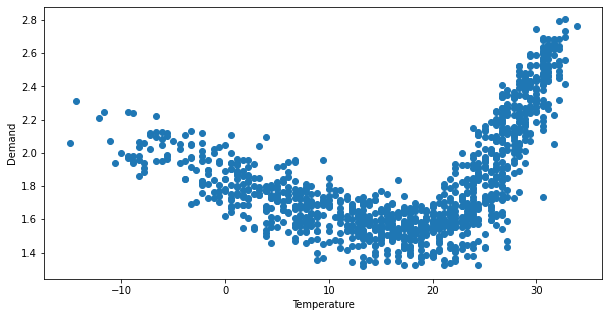

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.show()

### Divide the dataset in train and test splits

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
print(X_train.shape[0])
print(X_test.shape[0])

767
329


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [35]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def quality_measures(y_true, y_pred, n_var, n_obs):
    n = n_obs       # Number of samples
    p = n_var+1     # Degree of the polynomio

    SSM = sum(((y_pred - np.mean(y_true))**2))
    SSE = sum((y_true - y_pred)**2)

    DFM = p - 1
    DFE = n - p

    fstat = round((SSM/DFM) / (SSE/DFE), 4)

    p_val = 1-scipy.stats.f.cdf(fstat, DFM, DFE) #find p-value of F test statistic

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    return rmse, r2, fstat, p_val

## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [36]:
estimator = LinearRegression()
estimator.fit(X, y)
y_test_pred = estimator.predict(X_test.reshape(-1, 1))
rmse, r2, fstat, p_val = quality_measures(y_test, y_test_pred, X_test.shape[1], X_test.shape[0])
measures1 = pd.DataFrame({
    "Measures": [rmse, r2, fstat, p_val]
}, index=[
    "Mean squared error",
    "r2 score",
    "f-statistic",
    "p-value"
])

measures1

,Measures
Mean squared error,3.164793e-01
r2 score,1.802985e-01
f-statistic,5.327310e+01
p-value,2.219669e-12


#### Visualize the prediction of the model 

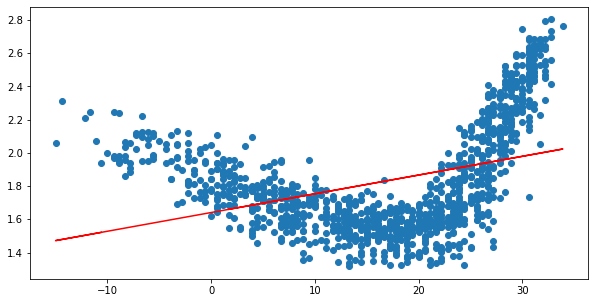

In [37]:
lpred = estimator.predict(X)
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, lpred, label="Estimator", color='red')
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_pol = poly.fit_transform(X_train)
X_pol_test = poly.transform(X_test)

In [39]:
estimator = LinearRegression()
estimator.fit(X_pol, y_train)
y_test_pred = estimator.predict(X_pol_test)
rmse, r2, fstat, p_val = quality_measures(y_test, y_test_pred, X_pol_test.shape[1], X_pol_test.shape[0])
measures2 = pd.DataFrame({
    "Measures": [rmse, r2, fstat, p_val]
}, index=[
    "Mean squared error",
    "r2 score",
    "f-statistic",
    "p-value"
])

measures2

,Measures
Mean squared error,1.829105e-01
r2 score,7.261943e-01
f-statistic,3.848865e+02
p-value,1.110223e-16


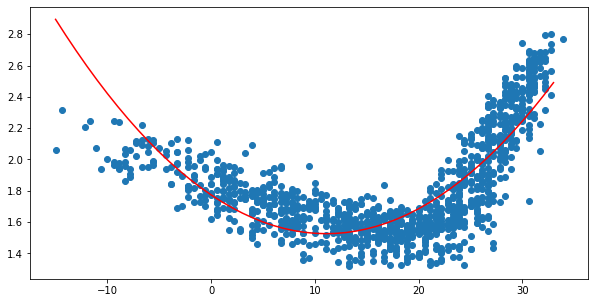

In [40]:
lpred = estimator.predict(poly.transform(np.arange(min(X), max(X)).reshape(-1,1)))
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(np.arange(min(X), max(X)), lpred, label="Estimator", color='red')
plt.show()

## Third experiment

#### Polynomial degree = 3

In [41]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_pol = poly.fit_transform(X_train)
X_pol_test = poly.transform(X_test)

In [42]:
estimator = LinearRegression()
estimator.fit(X_pol, y_train)
y_test_pred = estimator.predict(X_pol_test)
rmse, r2, fstat, p_val = quality_measures(y_test, y_test_pred, X_pol_test.shape[1], X_pol_test.shape[0])
measures3 = pd.DataFrame({
    "Measures": [rmse, r2, fstat, p_val]
}, index=[
    "Mean squared error",
    "r2 score",
    "f-statistic",
    "p-value"
])

measures3

,Measures
Mean squared error,1.474768e-01
r2 score,8.220029e-01
f-statistic,5.023183e+02
p-value,1.110223e-16


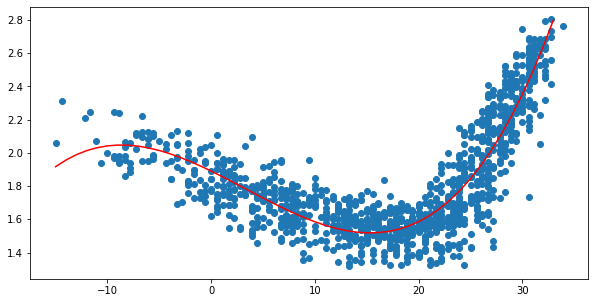

In [43]:
lpred = estimator.predict(poly.transform(np.arange(min(X), max(X)).reshape(-1,1)))
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(np.arange(min(X), max(X)), lpred, label="Estimator", color='red')
plt.show()

## Fourth experiment
### Polynomial degree = 4

In [44]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_pol = poly.fit_transform(X_train)
X_pol_test = poly.transform(X_test)

In [45]:
estimator = LinearRegression()
estimator.fit(X_pol, y_train)
y_test_pred = estimator.predict(X_pol_test)
rmse, r2, fstat, p_val = quality_measures(y_test, y_test_pred, X_pol_test.shape[1], X_pol_test.shape[0])
measures4 = pd.DataFrame({
    "Measures": [rmse, r2, fstat, p_val]
}, index=[
    "Mean squared error",
    "r2 score",
    "f-statistic",
    "p-value"
])

measures4

,Measures
Mean squared error,1.460612e-01
r2 score,8.254037e-01
f-statistic,3.900454e+02
p-value,1.110223e-16


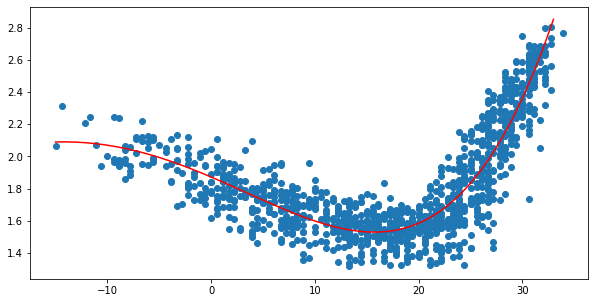

In [46]:
lpred = estimator.predict(poly.transform(np.arange(min(X), max(X)).reshape(-1,1)))
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(np.arange(min(X), max(X)), lpred, label="Estimator", color='red')
plt.show()

## Compare the performance of the four models

In [48]:
compare = pd.DataFrame({
    "linear": measures1['Measures'],
    "degree = 2": measures2['Measures'],
    "degree = 3": measures3['Measures'],
    "degree = 4": measures4['Measures']
}, index=measures1.index)
compare

,linear,degree = 2,degree = 3,degree = 4
Mean squared error,3.164793e-01,1.829105e-01,1.474768e-01,1.460612e-01
r2 score,1.802985e-01,7.261943e-01,8.220029e-01,8.254037e-01
f-statistic,5.327310e+01,3.848865e+02,5.023183e+02,3.900454e+02
p-value,2.219669e-12,1.110223e-16,1.110223e-16,1.110223e-16
